# Data Preparation

In [57]:
import pandas as pd
from ydata_profiling import ProfileReport

In [58]:
data = pd.read_csv('./../data/post_pandemic_remote_work_health_impact_2025.csv')
data.head()

Survey_Date  Age  Gender         Region               Industry  \
0  2025-06-01   27  Female           Asia  Professional Services   
1  2025-06-01   37  Female           Asia  Professional Services   
2  2025-06-01   32  Female         Africa              Education   
3  2025-06-01   40  Female         Europe              Education   
4  2025-06-01   30    Male  South America          Manufacturing   

           Job_Role Work_Arrangement  Hours_Per_Week Mental_Health_Status  \
0      Data Analyst           Onsite              64      Stress Disorder   
1      Data Analyst           Onsite              37      Stress Disorder   
2  Business Analyst           Onsite              36                 ADHD   
3      Data Analyst           Onsite              63                 ADHD   
4   DevOps Engineer           Hybrid              65                  NaN   

  Burnout_Level  Work_Life_Balance_Score     Physical_Health_Issues  \
0          High                        3   Shoulder Pain; Neck Pain   
1          High                        4                  Back Pain   
2          High                        3  Shoulder Pain; Eye Strain   
3        Medium                        1  Shoulder Pain; Eye Strain   
4        Medium                        5                        NaN   

   Social_Isolation_Score Salary_Range  
0                       2     $40K-60K  
1                       2    $80K-100K  
2                       2    $80K-100K  
3                       2     $60K-80K  
4                       4     $60K-80K

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

In [60]:

profile = ProfileReport(data, title="Profiling Report",explorative=True)
profile.to_file("./../reports/raw_data.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 3421.93it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

### Missing values for `Mental_Health_Status` and `Physical_Health_Issues`

In [62]:
data.columns

Index(['Survey_Date', 'Age', 'Gender', 'Region', 'Industry', 'Job_Role',
       'Work_Arrangement', 'Hours_Per_Week', 'Mental_Health_Status',
       'Burnout_Level', 'Work_Life_Balance_Score', 'Physical_Health_Issues',
       'Social_Isolation_Score', 'Salary_Range'],
      dtype='object')

In [63]:
data.Mental_Health_Status.value_counts()

Mental_Health_Status
PTSD               423
Anxiety            394
Burnout            392
Depression         386
ADHD               385
Stress Disorder    378
Name: count, dtype: int64

In [64]:
data[data.Mental_Health_Status.isna()]

Survey_Date  Age  Gender         Region               Industry  \
4     2025-06-01   30    Male  South America          Manufacturing   
6     2025-06-01   50  Female           Asia          Manufacturing   
10    2025-06-01   42  Female           Asia  Professional Services   
17    2025-06-01   36  Female         Africa       Customer Service   
19    2025-06-01   27  Female         Africa             Healthcare   
...          ...  ...     ...            ...                    ...   
3131  2025-06-26   45  Female         Europe          Manufacturing   
3137  2025-06-26   24  Female        Oceania             Healthcare   
3147  2025-06-26   24    Male           Asia              Marketing   
3151  2025-06-26   32    Male         Europe  Professional Services   
3153  2025-06-26   24  Female  South America  Professional Services   

                      Job_Role Work_Arrangement  Hours_Per_Week  \
4              DevOps Engineer           Hybrid              65   
6                   IT Support           Onsite              62   
10             Project Manager           Onsite              38   
17                  HR Manager           Onsite              63   
19             Account Manager           Remote              43   
...                        ...              ...             ...   
3131                HR Manager           Hybrid              40   
3137  Customer Service Manager           Onsite              47   
3147           DevOps Engineer           Hybrid              35   
3151        Research Scientist           Onsite              61   
3153         Software Engineer           Remote              54   

     Mental_Health_Status Burnout_Level  Work_Life_Balance_Score  \
4                     NaN        Medium                        5   
6                     NaN        Medium                        4   
10                    NaN          High                        3   
17                    NaN        Medium                        3   
19                    NaN        Medium                        1   
...                   ...           ...                      ...   
3131                  NaN          High                        2   
3137                  NaN        Medium                        2   
3147                  NaN        Medium                        3   
3151                  NaN           Low                        3   
3153                  NaN        Medium                        4   

                               Physical_Health_Issues  Social_Isolation_Score  \
4                                                 NaN                       4   
6                Back Pain; Shoulder Pain; Wrist Pain                       2   
10                                      Shoulder Pain                       2   
17                                      Shoulder Pain                       2   
19                                                NaN                       4   
...                                               ...                     ...   
3131                                              NaN                       1   
3137                                              NaN                       1   
3147  Back Pain; Shoulder Pain; Eye Strain; Neck Pain                       2   
3151                        Shoulder Pain; Eye Strain                       3   
3153                                       Eye Strain                       4   

     Salary_Range  
4        $60K-80K  
6       $80K-100K  
10     $100K-120K  
17       $60K-80K  
19      $80K-100K  
...           ...  
3131     $60K-80K  
3137     $40K-60K  
3147     $60K-80K  
3151     $60K-80K  
3153   $100K-120K  

[799 rows x 14 columns]

In [65]:
data.Physical_Health_Issues.value_counts().to_clipboard()

In [66]:
data[data.Physical_Health_Issues.isna()]

Survey_Date  Age      Gender         Region               Industry  \
4     2025-06-01   30        Male  South America          Manufacturing   
7     2025-06-01   63  Non-binary         Europe  Professional Services   
14    2025-06-01   50        Male         Europe  Professional Services   
19    2025-06-01   27      Female         Africa             Healthcare   
25    2025-06-01   59        Male         Africa              Education   
...          ...  ...         ...            ...                    ...   
3123  2025-06-26   35      Female  North America  Professional Services   
3131  2025-06-26   45      Female         Europe          Manufacturing   
3133  2025-06-26   47      Female           Asia             Healthcare   
3137  2025-06-26   24      Female        Oceania             Healthcare   
3150  2025-06-26   42        Male  North America             Technology   

                      Job_Role Work_Arrangement  Hours_Per_Week  \
4              DevOps Engineer           Hybrid              65   
7             Technical Writer           Onsite              55   
14        Social Media Manager           Remote              64   
19             Account Manager           Remote              43   
25        Social Media Manager           Onsite              53   
...                        ...              ...             ...   
3123            Content Writer           Onsite              38   
3131                HR Manager           Hybrid              40   
3133              Data Analyst           Onsite              38   
3137  Customer Service Manager           Onsite              47   
3150           Account Manager           Onsite              45   

     Mental_Health_Status Burnout_Level  Work_Life_Balance_Score  \
4                     NaN        Medium                        5   
7                 Anxiety          High                        3   
14                Burnout        Medium                        1   
19                    NaN        Medium                        1   
25                Anxiety        Medium                        3   
...                   ...           ...                      ...   
3123                  NaN        Medium                        3   
3131                  NaN          High                        2   
3133                 PTSD           Low                        5   
3137                  NaN        Medium                        2   
3150                 ADHD           Low                        3   

     Physical_Health_Issues  Social_Isolation_Score Salary_Range  
4                       NaN                       4     $60K-80K  
7                       NaN                       2   $100K-120K  
14                      NaN                       4     $60K-80K  
19                      NaN                       4    $80K-100K  
25                      NaN                       1     $60K-80K  
...                     ...                     ...          ...  
3123                    NaN                       1     $60K-80K  
3131                    NaN                       1     $60K-80K  
3133                    NaN                       3       $120K+  
3137                    NaN                       1     $40K-60K  
3150                    NaN                       3    $80K-100K  

[280 rows x 14 columns]

For the `Mental_Health_Status` in which we do not have much categories, I will start testing to convert this category to `unknown`.

For the `Physical_Health_Issues` it is a little bit trickier, since we have several categories inside it. So I will remove those lines, and split the Health issues in several columns

In [67]:
data['Mental_Health_Status'] = data['Mental_Health_Status'].fillna('unknown')

In [68]:
data.Mental_Health_Status.value_counts()

Mental_Health_Status
unknown            799
PTSD               423
Anxiety            394
Burnout            392
Depression         386
ADHD               385
Stress Disorder    378
Name: count, dtype: int64

In [69]:
# Remove NA values from 'Physical_Health_Issues' column
data = data.dropna(subset=['Physical_Health_Issues'])
data.head()

Survey_Date  Age  Gender   Region               Industry          Job_Role  \
0  2025-06-01   27  Female     Asia  Professional Services      Data Analyst   
1  2025-06-01   37  Female     Asia  Professional Services      Data Analyst   
2  2025-06-01   32  Female   Africa              Education  Business Analyst   
3  2025-06-01   40  Female   Europe              Education      Data Analyst   
5  2025-06-01   52    Male  Oceania       Customer Service  Business Analyst   

  Work_Arrangement  Hours_Per_Week Mental_Health_Status Burnout_Level  \
0           Onsite              64      Stress Disorder          High   
1           Onsite              37      Stress Disorder          High   
2           Onsite              36                 ADHD          High   
3           Onsite              63                 ADHD        Medium   
5           Onsite              61              Burnout        Medium   

   Work_Life_Balance_Score     Physical_Health_Issues  Social_Isolation_Score  \
0                        3   Shoulder Pain; Neck Pain                       2   
1                        4                  Back Pain                       2   
2                        3  Shoulder Pain; Eye Strain                       2   
3                        1  Shoulder Pain; Eye Strain                       2   
5                        4   Back Pain; Shoulder Pain                       3   

  Salary_Range  
0     $40K-60K  
1    $80K-100K  
2    $80K-100K  
3     $60K-80K  
5     $60K-80K

In [70]:
# Split 'Physical_Health_Issues' by ';' and create binary columns for each unique issue
issues = data['Physical_Health_Issues'].dropna().str.split(';').explode().str.strip().unique()
for issue in issues:
    data[f'Physical_Health_{issue.replace(" ", "_")}'] = data['Physical_Health_Issues'].apply(lambda x: int(issue in str(x).split(';')) if pd.notna(x) else 0)

data.head()

/var/folders/19/gtq_gk0d5hvb3lm1wj6wrgjw55z_x9/T/ipykernel_2880/3102544550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Physical_Health_{issue.replace(" ", "_")}'] = data['Physical_Health_Issues'].apply(lambda x: int(issue in str(x).split(';')) if pd.notna(x) else 0)
/var/folders/19/gtq_gk0d5hvb3lm1wj6wrgjw55z_x9/T/ipykernel_2880/3102544550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Physical_Health_{issue.replace(" ", "_")}'] = data['Physical_Health_Issues'].apply(lambda x: int

Survey_Date  Age  Gender   Region               Industry          Job_Role  \
0  2025-06-01   27  Female     Asia  Professional Services      Data Analyst   
1  2025-06-01   37  Female     Asia  Professional Services      Data Analyst   
2  2025-06-01   32  Female   Africa              Education  Business Analyst   
3  2025-06-01   40  Female   Europe              Education      Data Analyst   
5  2025-06-01   52    Male  Oceania       Customer Service  Business Analyst   

  Work_Arrangement  Hours_Per_Week Mental_Health_Status Burnout_Level  \
0           Onsite              64      Stress Disorder          High   
1           Onsite              37      Stress Disorder          High   
2           Onsite              36                 ADHD          High   
3           Onsite              63                 ADHD        Medium   
5           Onsite              61              Burnout        Medium   

   Work_Life_Balance_Score     Physical_Health_Issues  Social_Isolation_Score  \
0                        3   Shoulder Pain; Neck Pain                       2   
1                        4                  Back Pain                       2   
2                        3  Shoulder Pain; Eye Strain                       2   
3                        1  Shoulder Pain; Eye Strain                       2   
5                        4   Back Pain; Shoulder Pain                       3   

  Salary_Range  Physical_Health_Shoulder_Pain  Physical_Health_Neck_Pain  \
0     $40K-60K                              1                          0   
1    $80K-100K                              0                          0   
2    $80K-100K                              1                          0   
3     $60K-80K                              1                          0   
5     $60K-80K                              0                          0   

   Physical_Health_Back_Pain  Physical_Health_Eye_Strain  \
0                          0                           0   
1                          1                           0   
2                          0                           0   
3                          0                           0   
5                          1                           0   

   Physical_Health_Wrist_Pain  
0                           0  
1                           0  
2                           0  
3                           0  
5                           0

In [71]:
data.columns

Index(['Survey_Date', 'Age', 'Gender', 'Region', 'Industry', 'Job_Role',
       'Work_Arrangement', 'Hours_Per_Week', 'Mental_Health_Status',
       'Burnout_Level', 'Work_Life_Balance_Score', 'Physical_Health_Issues',
       'Social_Isolation_Score', 'Salary_Range',
       'Physical_Health_Shoulder_Pain', 'Physical_Health_Neck_Pain',
       'Physical_Health_Back_Pain', 'Physical_Health_Eye_Strain',
       'Physical_Health_Wrist_Pain'],
      dtype='object')

In [72]:
# Remove the 'Physical_Health_Issues' column from the DataFrame
data = data.drop(columns=['Physical_Health_Issues'])
data.head()

Survey_Date  Age  Gender   Region               Industry          Job_Role  \
0  2025-06-01   27  Female     Asia  Professional Services      Data Analyst   
1  2025-06-01   37  Female     Asia  Professional Services      Data Analyst   
2  2025-06-01   32  Female   Africa              Education  Business Analyst   
3  2025-06-01   40  Female   Europe              Education      Data Analyst   
5  2025-06-01   52    Male  Oceania       Customer Service  Business Analyst   

  Work_Arrangement  Hours_Per_Week Mental_Health_Status Burnout_Level  \
0           Onsite              64      Stress Disorder          High   
1           Onsite              37      Stress Disorder          High   
2           Onsite              36                 ADHD          High   
3           Onsite              63                 ADHD        Medium   
5           Onsite              61              Burnout        Medium   

   Work_Life_Balance_Score  Social_Isolation_Score Salary_Range  \
0                        3                       2     $40K-60K   
1                        4                       2    $80K-100K   
2                        3                       2    $80K-100K   
3                        1                       2     $60K-80K   
5                        4                       3     $60K-80K   

   Physical_Health_Shoulder_Pain  Physical_Health_Neck_Pain  \
0                              1                          0   
1                              0                          0   
2                              1                          0   
3                              1                          0   
5                              0                          0   

   Physical_Health_Back_Pain  Physical_Health_Eye_Strain  \
0                          0                           0   
1                          1                           0   
2                          0                           0   
3                          0                           0   
5                          1                           0   

   Physical_Health_Wrist_Pain  
0                           0  
1                           0  
2                           0  
3                           0  
5                           0

In [73]:
data.Industry.value_counts()

Industry
Professional Services    659
Technology               544
Finance                  335
Manufacturing            331
Education                270
Healthcare               224
Marketing                186
Retail                   168
Customer Service         160
Name: count, dtype: int64

In [74]:
data.Job_Role.value_counts()

Job_Role
Research Scientist              139
DevOps Engineer                 136
IT Support                      132
Operations Manager              131
Customer Service Manager        131
Data Analyst                    130
Project Manager                 130
UX Designer                     128
Social Media Manager            128
HR Manager                      127
Data Scientist                  122
Account Manager                 120
Product Manager                 120
Quality Assurance               119
Business Analyst                119
Software Engineer               118
Executive Assistant             111
Marketing Specialist            111
Consultant                      110
Technical Writer                108
Content Writer                  106
Digital Marketing Specialist    101
Financial Analyst               100
Sales Representative            100
Name: count, dtype: int64

In [75]:
data[["Industry", "Job_Role"]].value_counts()

Industry               Job_Role                    
Professional Services  UX Designer                     37
                       Data Analyst                    36
                       Social Media Manager            36
                       Project Manager                 34
                       HR Manager                      33
                                                       ..
Retail                 Digital Marketing Specialist     4
Healthcare             Technical Writer                 3
Marketing              Data Analyst                     3
                       HR Manager                       2
Customer Service       Sales Representative             2
Name: count, Length: 216, dtype: int64

In [76]:

profile = ProfileReport(data, title="Profiling Report - Missing Data Fixed",explorative=True)
profile.to_file("./../reports/prep_data.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:00<00:00, 1531.79it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [77]:
data.Region.value_counts()

Region
South America    521
Africa           484
Asia             472
Europe           472
Oceania          472
North America    456
Name: count, dtype: int64

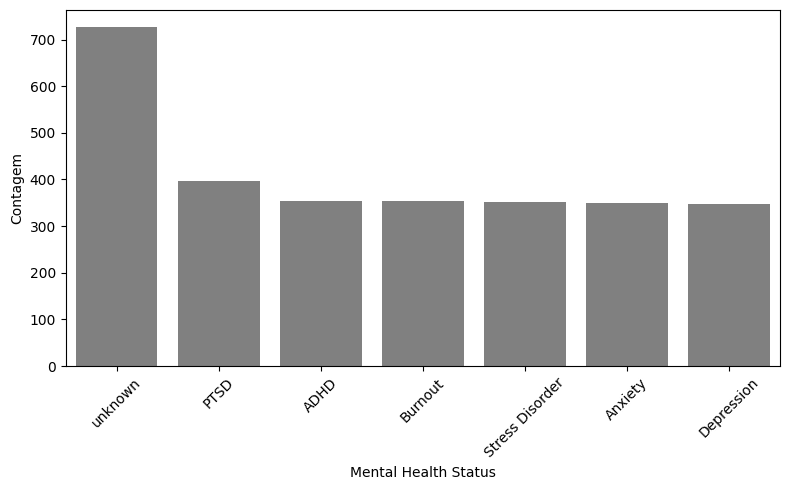

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8,5))
sns.countplot(x='Mental_Health_Status', data=data, order=data['Mental_Health_Status'].value_counts().index, color='gray')
#plt.title('Distribuição da variável Mental_Health_Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 3156
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Survey_Date                    2877 non-null   object
 1   Age                            2877 non-null   int64 
 2   Gender                         2877 non-null   object
 3   Region                         2877 non-null   object
 4   Industry                       2877 non-null   object
 5   Job_Role                       2877 non-null   object
 6   Work_Arrangement               2877 non-null   object
 7   Hours_Per_Week                 2877 non-null   int64 
 8   Mental_Health_Status           2877 non-null   object
 9   Burnout_Level                  2877 non-null   object
 10  Work_Life_Balance_Score        2877 non-null   int64 
 11  Social_Isolation_Score         2877 non-null   int64 
 12  Salary_Range                   2877 non-null   object
 13  Physical

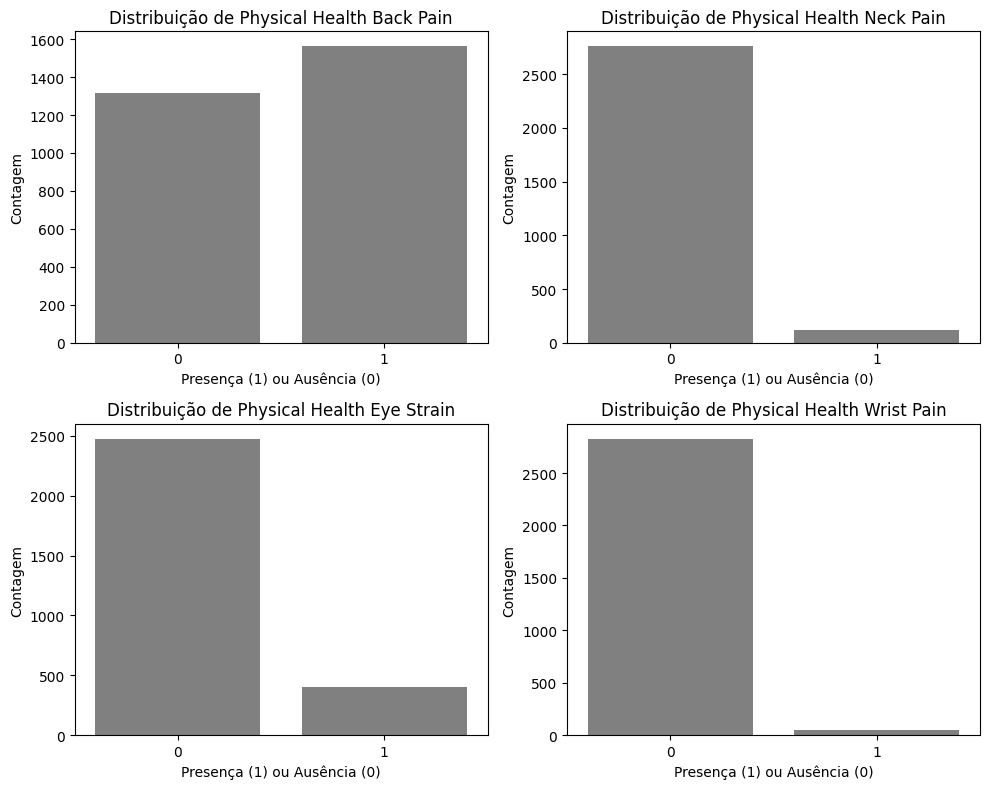

In [80]:
# Gráficos para as 4 colunas de dor física
physical_pain_cols = [
    'Physical_Health_Back_Pain',
    'Physical_Health_Neck_Pain',
    'Physical_Health_Eye_Strain',
    'Physical_Health_Wrist_Pain'
]

fig, axes = plt.subplots(2, 2, figsize=(10,8))
for ax, col in zip(axes.flatten(), physical_pain_cols):
    sns.countplot(x=col, data=data, ax=ax, color='gray')
    ax.set_title(f'Distribuição de {col.replace("_", " ")}')
    ax.set_xlabel('Presença (1) ou Ausência (0)')
    ax.set_ylabel('Contagem')


plt.tight_layout()
plt.show()

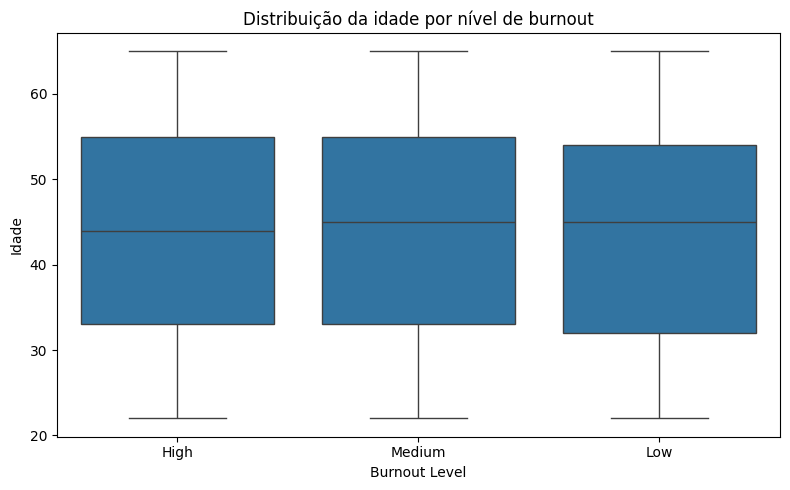

In [81]:
# Boxplot de age por burnout_level
plt.figure(figsize=(8,5))
sns.boxplot(x='Burnout_Level', y='Age', data=data)
plt.title('Distribuição da idade por nível de burnout')
plt.xlabel('Burnout Level')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

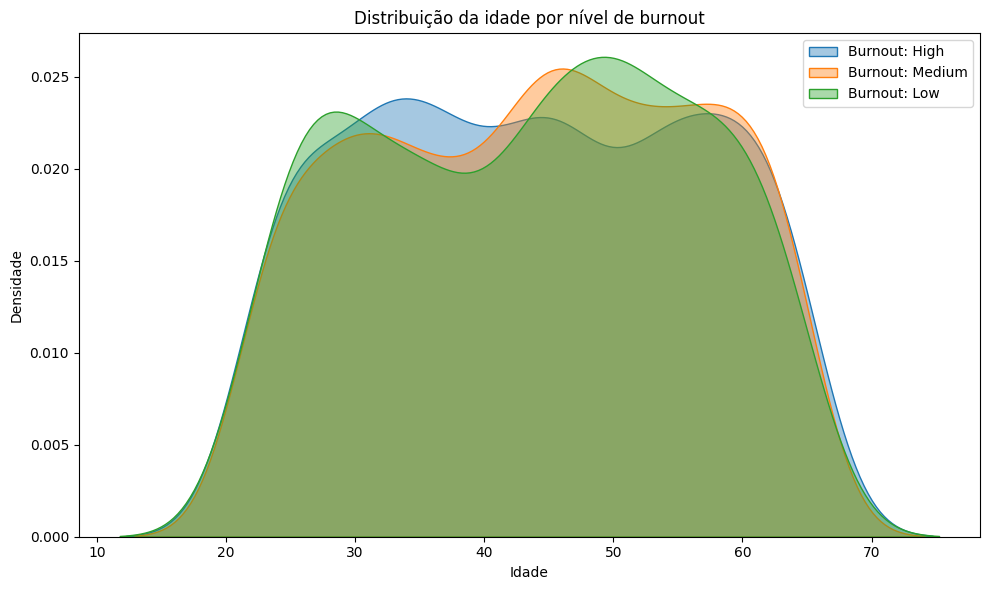

In [82]:
# Distribuição de age por burnout_level
plt.figure(figsize=(10,6))
for level in data['Burnout_Level'].unique():
    subset = data[data['Burnout_Level'] == level]
    sns.kdeplot(subset['Age'], label=f'Burnout: {level}', fill=True, alpha=0.4)
plt.title('Distribuição da idade por nível de burnout')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.legend()
plt.tight_layout()
plt.show()

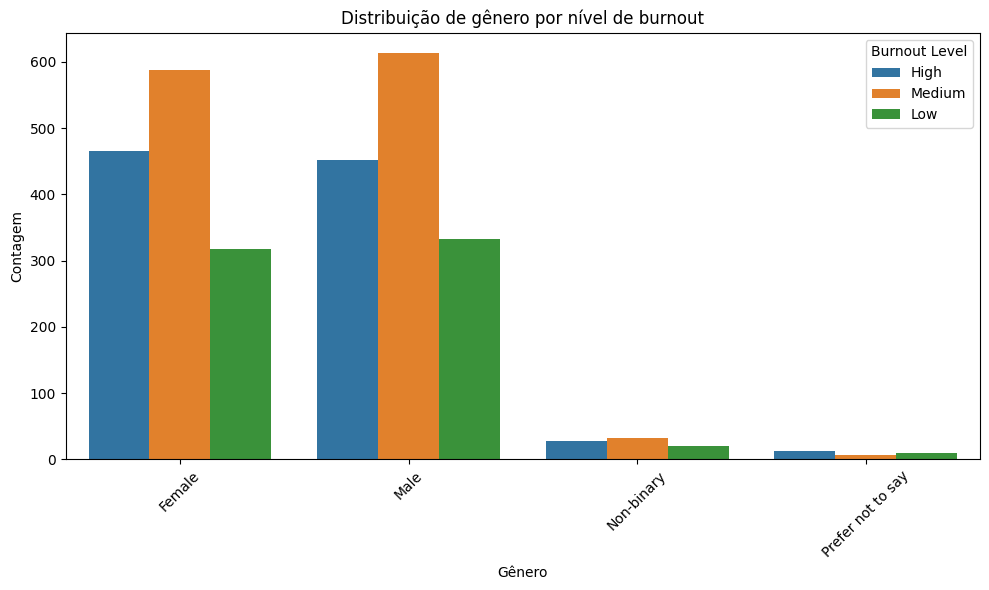

In [83]:
# Distribuição de gender por burnout_level
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Burnout_Level', data=data)
plt.title('Distribuição de gênero por nível de burnout')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Burnout Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [84]:
data.columns

Index(['Survey_Date', 'Age', 'Gender', 'Region', 'Industry', 'Job_Role',
       'Work_Arrangement', 'Hours_Per_Week', 'Mental_Health_Status',
       'Burnout_Level', 'Work_Life_Balance_Score', 'Social_Isolation_Score',
       'Salary_Range', 'Physical_Health_Shoulder_Pain',
       'Physical_Health_Neck_Pain', 'Physical_Health_Back_Pain',
       'Physical_Health_Eye_Strain', 'Physical_Health_Wrist_Pain'],
      dtype='object')

In [85]:
data.to_csv('./../data/prepared_data.csv', index=False)

In [29]:
# Remove the 'Physical_Health_Issues' column from the DataFrame
data = data.drop(columns=['Survey_Date'])
data.head()

Age  Gender   Region               Industry          Job_Role  \
0   27  Female     Asia  Professional Services      Data Analyst   
1   37  Female     Asia  Professional Services      Data Analyst   
2   32  Female   Africa              Education  Business Analyst   
3   40  Female   Europe              Education      Data Analyst   
5   52    Male  Oceania       Customer Service  Business Analyst   

  Work_Arrangement  Hours_Per_Week Mental_Health_Status Burnout_Level  \
0           Onsite              64      Stress Disorder          High   
1           Onsite              37      Stress Disorder          High   
2           Onsite              36                 ADHD          High   
3           Onsite              63                 ADHD        Medium   
5           Onsite              61              Burnout        Medium   

   Work_Life_Balance_Score  Social_Isolation_Score Salary_Range  \
0                        3                       2     $40K-60K   
1                        4                       2    $80K-100K   
2                        3                       2    $80K-100K   
3                        1                       2     $60K-80K   
5                        4                       3     $60K-80K   

   Physical_Health_Shoulder_Pain  Physical_Health_Neck_Pain  \
0                              1                          0   
1                              0                          0   
2                              1                          0   
3                              1                          0   
5                              0                          0   

   Physical_Health_Back_Pain  Physical_Health_Eye_Strain  \
0                          0                           0   
1                          1                           0   
2                          0                           0   
3                          0                           0   
5                          1                           0   

   Physical_Health_Wrist_Pain  
0                           0  
1                           0  
2                           0  
3                           0  
5                           0

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 3156
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Survey_Date                    2877 non-null   object
 1   Age                            2877 non-null   int64 
 2   Gender                         2877 non-null   object
 3   Region                         2877 non-null   object
 4   Industry                       2877 non-null   object
 5   Job_Role                       2877 non-null   object
 6   Work_Arrangement               2877 non-null   object
 7   Hours_Per_Week                 2877 non-null   int64 
 8   Mental_Health_Status           2877 non-null   object
 9   Burnout_Level                  2877 non-null   object
 10  Work_Life_Balance_Score        2877 non-null   int64 
 11  Social_Isolation_Score         2877 non-null   int64 
 12  Salary_Range                   2877 non-null   object
 13  Physical

In [41]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Selecionar colunas categóricas
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols), index=data.index)

# Concatenar com colunas numéricas
data_kmeans = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)

# Normalizar todas as variáveis para o KMeans
scaler = MinMaxScaler()
data_kmeans = pd.DataFrame(scaler.fit_transform(data_kmeans), columns=data_kmeans.columns, index=data_kmeans.index)
data_kmeans.head()

Age  Hours_Per_Week  Work_Life_Balance_Score  Social_Isolation_Score  \
0  0.116279        0.966667                     0.50                    0.25   
1  0.348837        0.066667                     0.75                    0.25   
2  0.232558        0.033333                     0.50                    0.25   
3  0.418605        0.933333                     0.00                    0.25   
5  0.697674        0.866667                     0.75                    0.50   

   Physical_Health_Shoulder_Pain  Physical_Health_Neck_Pain  \
0                            1.0                        0.0   
1                            0.0                        0.0   
2                            1.0                        0.0   
3                            1.0                        0.0   
5                            0.0                        0.0   

   Physical_Health_Back_Pain  Physical_Health_Eye_Strain  \
0                        0.0                         0.0   
1                        1.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
5                        1.0                         0.0   

   Physical_Health_Wrist_Pain   cluster  ...  Mental_Health_Status_Depression  \
0                         0.0  0.333333  ...                              0.0   
1                         0.0  1.000000  ...                              0.0   
2                         0.0  1.000000  ...                              0.0   
3                         0.0  0.333333  ...                              0.0   
5                         0.0  0.000000  ...                              0.0   

   Mental_Health_Status_PTSD  Mental_Health_Status_Stress Disorder  \
0                        0.0                                   1.0   
1                        0.0                                   1.0   
2                        0.0                                   0.0   
3                        0.0                                   0.0   
5                        0.0                                   0.0   

   Mental_Health_Status_unknown  Burnout_Level_Low  Burnout_Level_Medium  \
0                           0.0                0.0                   0.0   
1                           0.0                0.0                   0.0   
2                           0.0                0.0                   0.0   
3                           0.0                0.0                   1.0   
5                           0.0                0.0                   1.0   

   Salary_Range_$120K+  Salary_Range_$40K-60K  Salary_Range_$60K-80K  \
0                  0.0                    1.0                    0.0   
1                  0.0                    0.0                    0.0   
2                  0.0                    0.0                    0.0   
3                  0.0                    0.0                    1.0   
5                  0.0                    0.0                    1.0   

   Salary_Range_$80K-100K  
0                     0.0  
1                     1.0  
2                     1.0  
3                     0.0  
5                     0.0  

[5 rows x 63 columns]

In [51]:
from sklearn.cluster import KMeans

# Definir número de clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_kmeans)

data['cluster'] = clusters
print('Contagem de cada cluster:')
print(data_kmeans['cluster'].value_counts())

Contagem de cada cluster:
cluster
0.000000    810
1.000000    742
0.666667    727
0.333333    598
Name: count, dtype: int64


/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: 

In [52]:
data_kmeans

Age  Hours_Per_Week  Work_Life_Balance_Score  \
0     0.116279        0.966667                     0.50   
1     0.348837        0.066667                     0.75   
2     0.232558        0.033333                     0.50   
3     0.418605        0.933333                     0.00   
5     0.697674        0.866667                     0.75   
...        ...             ...                      ...   
3152  0.930233        0.100000                     0.75   
3153  0.046512        0.633333                     0.75   
3154  0.534884        0.800000                     0.00   
3155  0.372093        0.566667                     0.50   
3156  0.744186        0.133333                     0.75   

      Social_Isolation_Score  Physical_Health_Shoulder_Pain  \
0                       0.25                            1.0   
1                       0.25                            0.0   
2                       0.25                            1.0   
3                       0.25                            1.0   
5                       0.50                            0.0   
...                      ...                            ...   
3152                    0.50                            1.0   
3153                    0.75                            0.0   
3154                    0.50                            1.0   
3155                    1.00                            1.0   
3156                    0.25                            0.0   

      Physical_Health_Neck_Pain  Physical_Health_Back_Pain  \
0                           0.0                        0.0   
1                           0.0                        1.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
5                           0.0                        1.0   
...                         ...                        ...   
3152                        0.0                        0.0   
3153                        0.0                        0.0   
3154                        0.0                        0.0   
3155                        0.0                        0.0   
3156                        0.0                        1.0   

      Physical_Health_Eye_Strain  Physical_Health_Wrist_Pain   cluster  ...  \
0                            0.0                         0.0  0.333333  ...   
1                            0.0                         0.0  1.000000  ...   
2                            0.0                         0.0  1.000000  ...   
3                            0.0                         0.0  0.333333  ...   
5                            0.0                         0.0  0.000000  ...   
...                          ...                         ...       ...  ...   
3152                         0.0                         0.0  0.666667  ...   
3153                         1.0                         0.0  0.333333  ...   
3154                         0.0                         0.0  0.000000  ...   
3155                         0.0                         0.0  0.333333  ...   
3156                         0.0                         0.0  0.666667  ...   

      Mental_Health_Status_Depression  Mental_Health_Status_PTSD  \
0                                 0.0                        0.0   
1                                 0.0                        0.0   
2                                 0.0                        0.0   
3                                 0.0                        0.0   
5                                 0.0                        0.0   
...                               ...                        ...   
3152                              0.0                        1.0   
3153                              0.0                        0.0   
3154                              0.0                        1.0   
3155                              1.0                        0.0   
3156                              0.0                        0.0   

      Mental_Health_Status_Stress 

/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: 

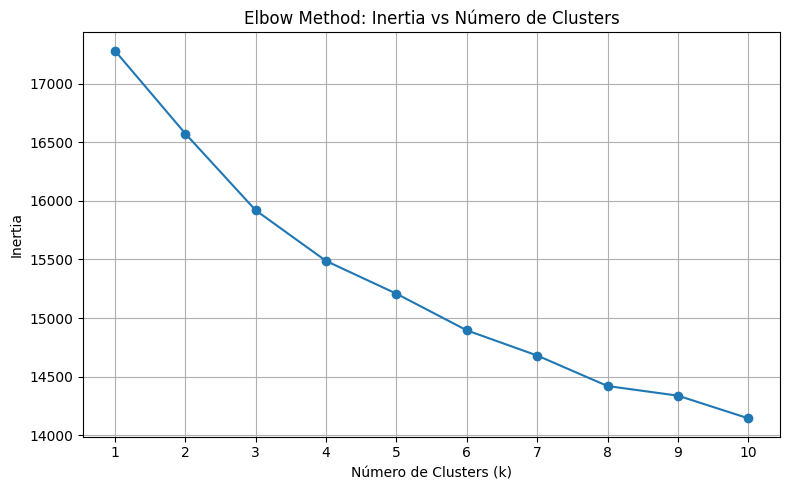

In [43]:
# Elbow Method para escolher o número ideal de clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_kmeans)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method: Inertia vs Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
from sklearn.cluster import KMeans

# Definir número de clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_kmeans)

data['cluster'] = clusters
print('Contagem de cada cluster:')
print(data_kmeans['cluster'].value_counts())

Contagem de cada cluster:
cluster
0.000000    810
1.000000    742
0.666667    727
0.333333    598
Name: count, dtype: int64


/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: 

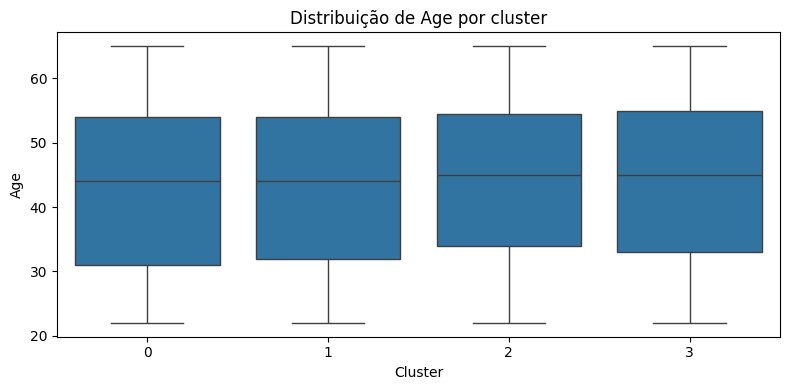

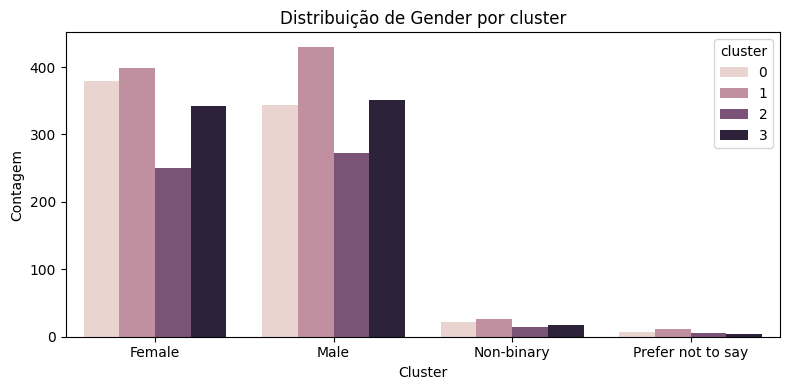

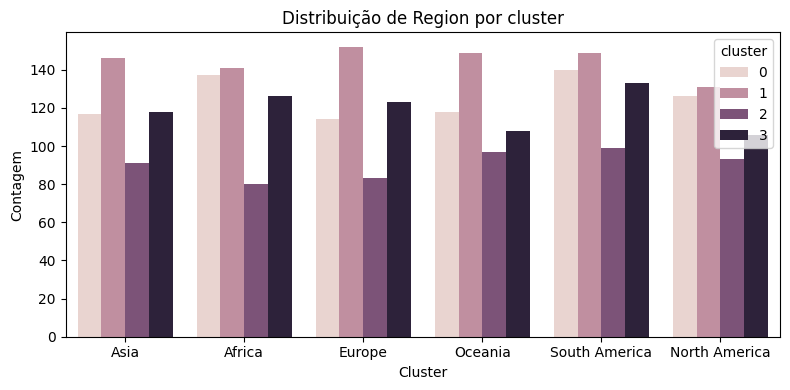

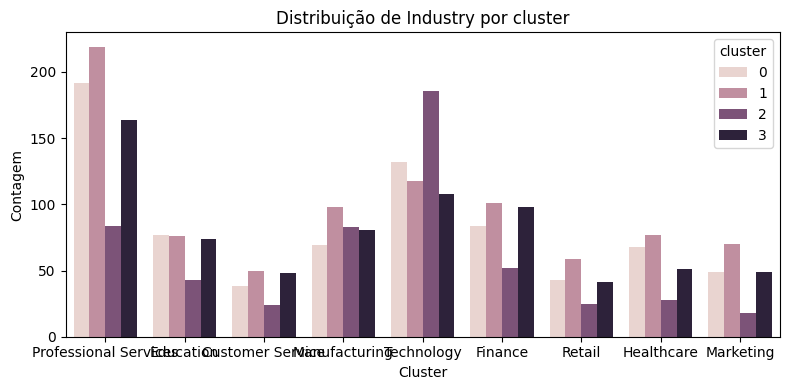

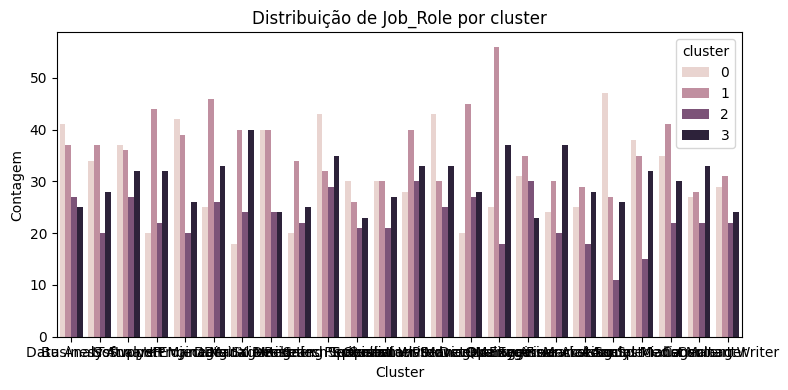

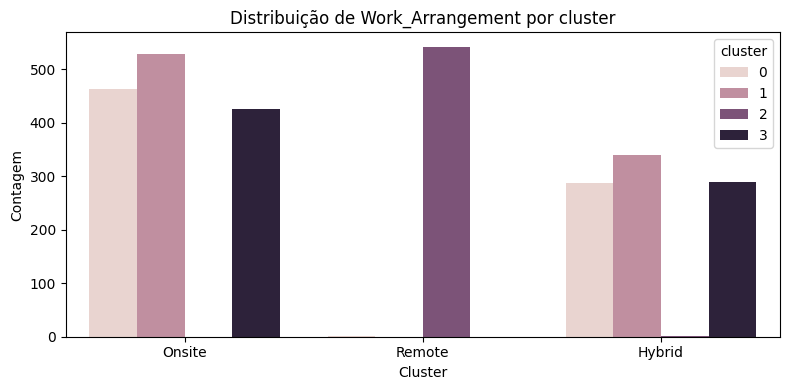

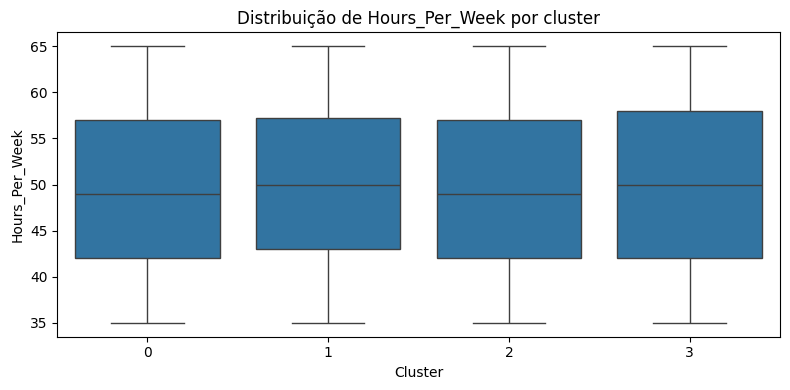

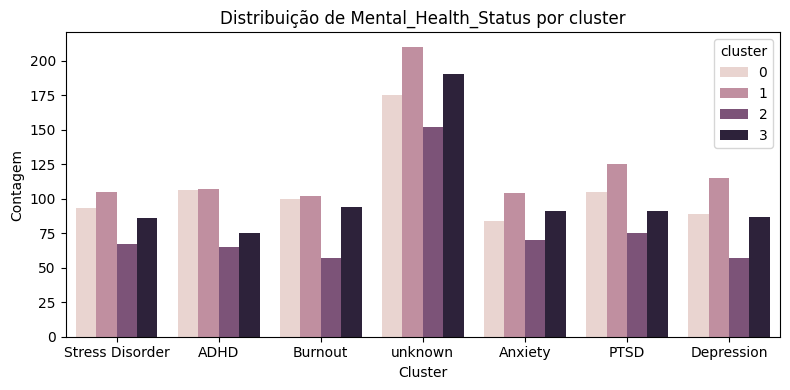

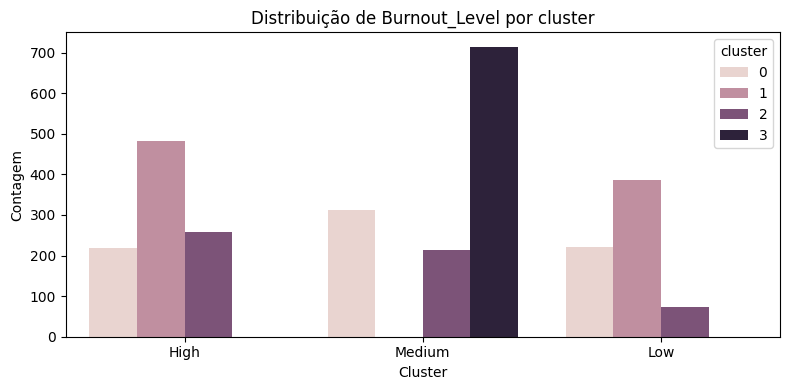

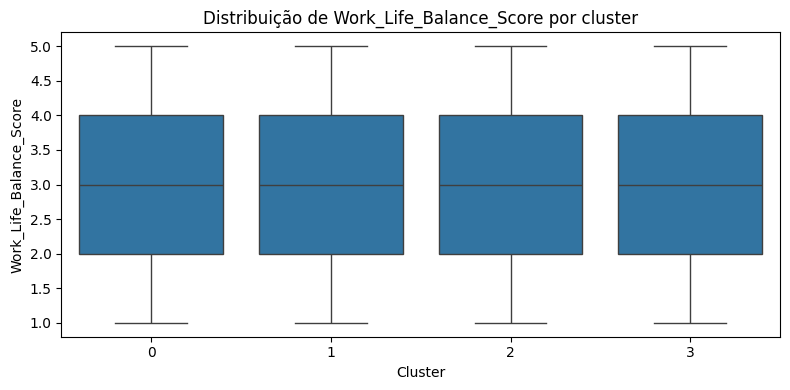

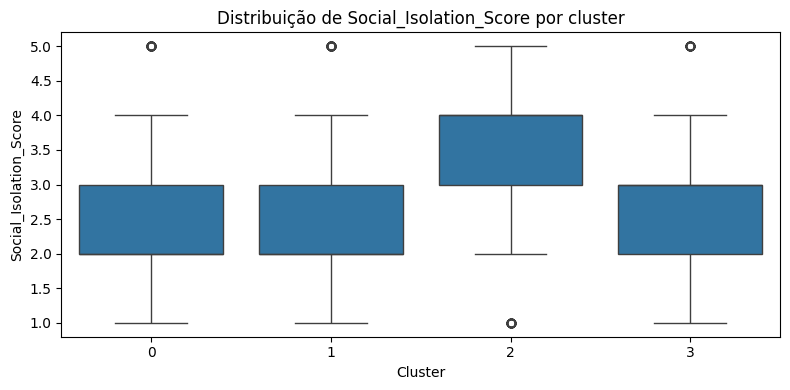

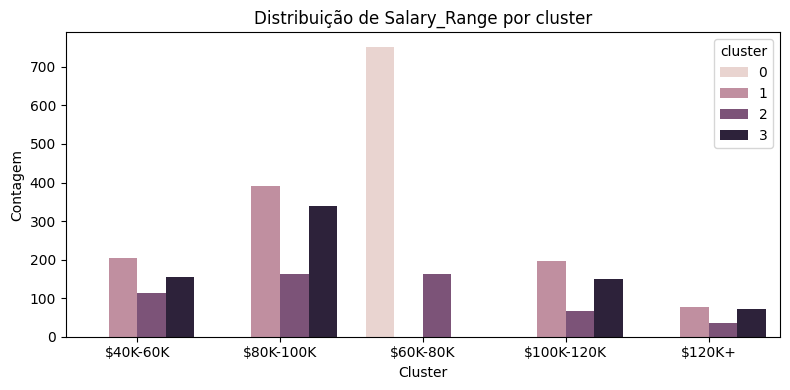

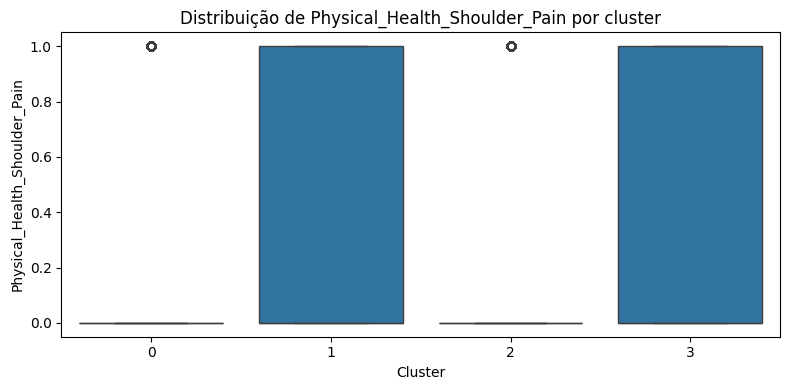

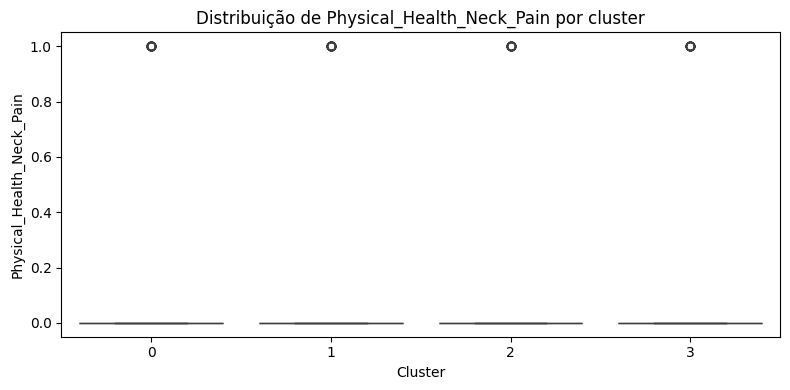

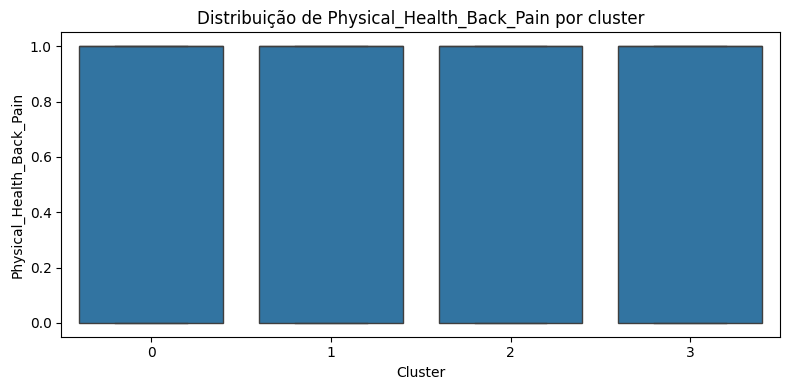

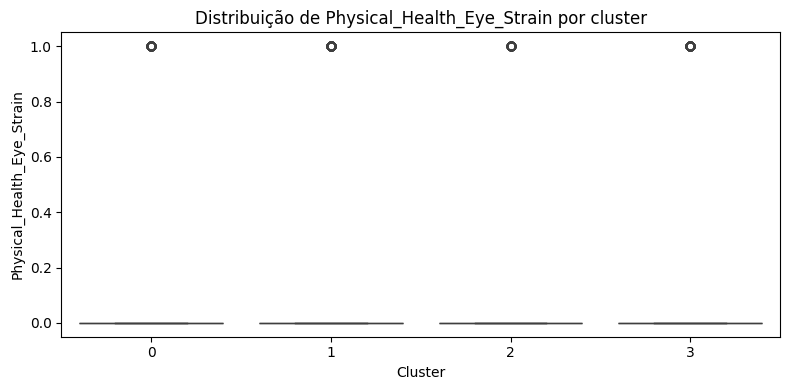

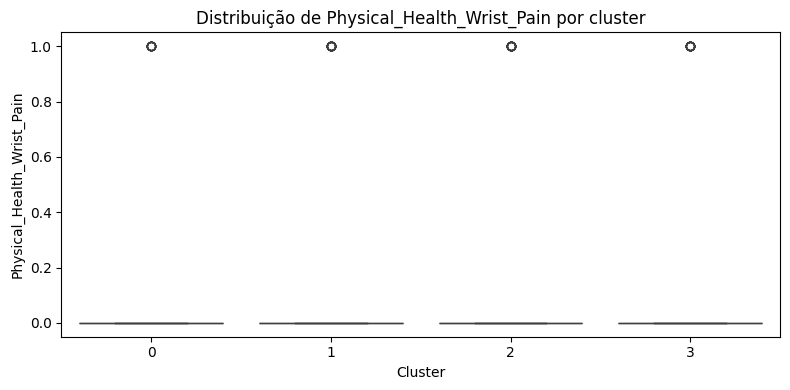

In [56]:
# Visualizar como cada feature afeta o cluster
import numpy as np

for col in data.columns:
    if col == 'cluster':
        continue
    plt.figure(figsize=(8,4))
    if np.issubdtype(data[col].dtype, np.number):
        sns.boxplot(x='cluster', y=col, data=data)
        plt.ylabel(col)
    else:
        sns.countplot(x=col, hue='cluster', data=data)
        plt.ylabel('Contagem')
    plt.title(f'Distribuição de {col} por cluster')
    plt.xlabel('Cluster')
    plt.tight_layout()
    plt.show()

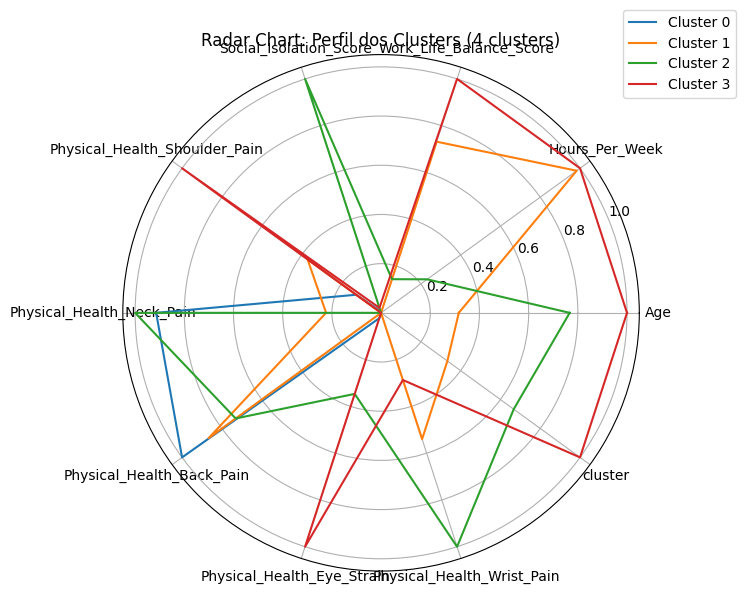

In [46]:
# Normalizar valores
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from math import pi

# Calcular médias das variáveis numéricas por cluster
num_cols = data.select_dtypes(include='number').columns
cluster_means = data.groupby('cluster')[num_cols].mean()

# Normalizar os valores
scaled = MinMaxScaler().fit_transform(cluster_means)

# Preparar variáveis para o radar
import matplotlib.pyplot as plt
from math import pi

labels_var = cluster_means.columns.tolist()
n_vars = len(labels_var)

plt.figure(figsize=(8, 6))
for i, row in enumerate(scaled):
    angles = [n / float(n_vars) * 2 * pi for n in range(n_vars)]
    row = list(row) + [row[0]]
    angles += [angles[0]]
    plt.polar(angles, row, label=f"Cluster {i}")

plt.xticks(angles[:-1], labels_var, fontsize=10)
plt.title("Radar Chart: Perfil dos Clusters (4 clusters)")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

# Se necessário, rode o KMeans com 4 clusters antes:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=4, random_state=42)
# clusters = kmeans.fit_predict(data_kmeans)
# data['cluster'] = clusters

In [47]:
# Radar Chart individual para cada cluster em documentos separados
num_cols = data.select_dtypes(include='number').columns
cluster_means = data.groupby('cluster')[num_cols].mean()

from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler().fit_transform(cluster_means)

import matplotlib.pyplot as plt
from math import pi
import os

labels_var = cluster_means.columns.tolist()
n_vars = len(labels_var)
angles = [n / float(n_vars) * 2 * pi for n in range(n_vars)]
angles += [angles[0]]

output_dir = 'cluster_radars'
os.makedirs(output_dir, exist_ok=True)

for i, row in enumerate(scaled):
    plt.figure(figsize=(6, 5))
    values = list(row) + [row[0]]
    plt.polar(angles, values, label=f"Cluster {i}")
    plt.xticks(angles[:-1], labels_var, fontsize=10)
    plt.title(f"Radar Chart: Perfil do Cluster {i}")
    plt.tight_layout()
    plt.savefig(f'{output_dir}/cluster_{i}_radar.png')
    plt.close()
print(f'Plots salvos em {output_dir}/')

Plots salvos em cluster_radars/


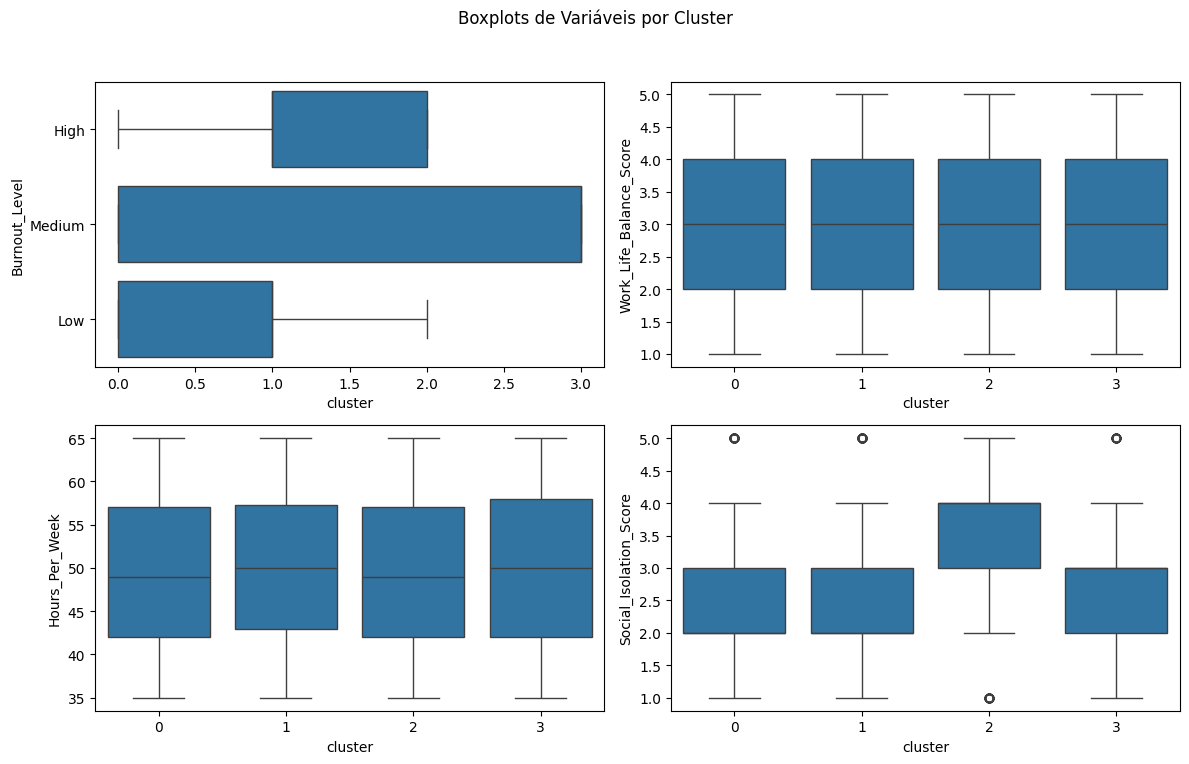

In [48]:
# Boxplots de variáveis por cluster em um grid 2x2
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(x='cluster', y='Burnout_Level', data=data, ax=axes[0,0])
sns.boxplot(x='cluster', y='Work_Life_Balance_Score', data=data, ax=axes[0,1])
sns.boxplot(x='cluster', y='Hours_Per_Week', data=data, ax=axes[1,0])
sns.boxplot(x='cluster', y='Social_Isolation_Score', data=data, ax=axes[1,1])

fig.suptitle("Boxplots de Variáveis por Cluster")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: 

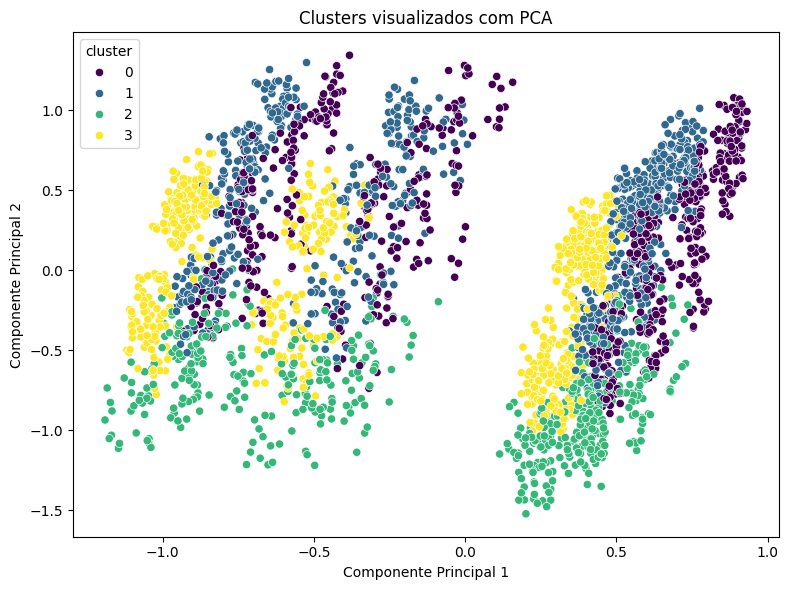

In [49]:
# Visualização dos clusters com PCA
from sklearn.decomposition import PCA

# Supondo que data_kmeans contém os dados escalados e data['cluster'] os labels
pca = PCA(n_components=2)
components = pca.fit_transform(data_kmeans)

plt.figure(figsize=(8,6))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=data['cluster'], palette="viridis")
plt.title("Clusters visualizados com PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.tight_layout()
plt.show()

In [ ]:
# X_scaled: dados numéricos e escalados
# df: DataFrame original com labels adicionados
# labels: resultado do KMeans (labels dos clusters)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['Cluster'] = labels
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
